In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(45)

In [2]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)

In [3]:
data_path = r'C:\Users\DucTRung\Desktop\country_by_freedom_indexes_in_covid19\wrangled_frame'

In [4]:
df = pd.read_csv(data_path + "\\wrangled_f_3.csv")

In [6]:
df

,country,region,continent,bri_country,bri_member_income_group,total_cases,total_deaths,total_recovered,total_tests,active_cases,serious_critical,cases_over_1_m,deaths_over_1_m,tests_over_1_m,life_expectancy_index_2019,happiness_index_2019,corruption_perception_index_2019,democracy_index_2019,economic_freedom_index_2019,press_freedom_index_2019
0,USA,Northern America,Northern America,non_member,NaN,588465.0,23711.0,37326.000000,2961818.0,527428.0,12772.0,1778.00,72.00,8948.0,79.11,68.92,69.0,79.6,76.8,74.31
1,Spain,Southern Europe,Europe,non_member,NaN,172541.0,18056.0,67504.000000,600000.0,86981.0,7371.0,3690.00,386.00,12833.0,83.99,63.54,62.0,82.9,65.7,78.01
2,Italy,Southern Europe,Europe,bri_member,High income,159516.0,20465.0,35435.000000,1046910.0,103616.0,3260.0,2638.00,338.00,17315.0,84.01,62.23,53.0,75.2,62.2,75.02
3,France,Western Europe,Europe,non_member,NaN,136779.0,14967.0,27718.000000,333807.0,94094.0,6821.0,2095.00,229.00,5114.0,83.13,65.92,69.0,81.2,63.8,77.79
4,Germany,Western Europe,Europe,non_member,NaN,130434.0,3220.0,68200.000000,1317887.0,59014.0,4288.0,1557.00,38.00,15730.0,81.88,69.85,80.0,86.8,73.5,85.40
5,UK,Northern Europe,Europe,non_member,NaN,93873.0,12107.0,2446.244681,382650.0,81422.0,1559.0,1383.00,178.00,5637.0,81.77,70.54,77.0,85.2,78.9,77.77
6,China,Eastern Asia,Asia,bri_member,Upper middle income,82249.0,3341.0,77738.000000,unknown,1170.0,116.0,57.00,2.00,unknown,77.47,51.91,41.0,22.6,58.4,21.08
7,Iran,Southern Asia,Asia,bri_member,Upper middle income,74877.0,4683.0,48129.000000,287359.0,22065.0,3691.0,891.00,56.00,3421.0,77.33,45.48,26.0,23.8,51.1,35.59
8,Turkey,Western Asian,Asia,bri_member,Upper middle income,61049.0,1296.0,3957.000000,410556.0,55796.0,1786.0,724.00,15.00,4868.0,78.45,53.73,39.0,40.9,64.6,47.19
9,Belgium,Western Europe,Europe,non_member,NaN,31119.0,4157.0,6868.000000,102151.0,20094.0,1223.0,2685.00,359.00,8814.0,82.17,69.23,75.0,76.4,67.3,87.93


# by Country

In [9]:
recover_country_f = df[['country', 'total_recovered']].sort_values(by='total_recovered', ascending=False).set_index('country')

## Top 10 countries

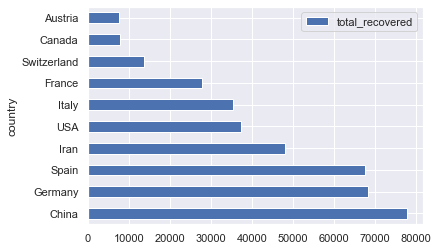

In [10]:
recover_country_f[:10].plot(kind='barh')

## List of 0 death countries

In [12]:
recover_country_f[recover_country_f['total_recovered'] == 0].index # 38 countries

Index(['Western Sahara', 'Burundi', 'South Sudan', 'Papua New Guinea',
       'Sao Tome and Principe', 'Eritrea', 'Sierra Leone', 'Seychelles',
       'Botswana', 'Grenada', 'Guinea-Bissau', 'Fiji', 'French Polynesia',
       'Malawi', 'Zimbabwe', 'Belize', 'Haiti', 'Yemen'],
      dtype='object', name='country')

## 80% death of the world

In [14]:
recover_country_f['relative_fre'] = recover_country_f['total_recovered'] / recover_country_f['total_recovered'].sum() * 100

In [15]:
recover_country_f['cum_fre'] = recover_country_f['relative_fre'].cumsum()

In [16]:
recover_country_f

,total_recovered,relative_fre,cum_fre
country,,,
China,77738.0,16.856645,16.856645
Germany,68200.0,14.788433,31.645078
Spain,67504.0,14.637513,46.282591
Iran,48129.0,10.436253,56.718844
USA,37326.0,8.093740,64.812584
Italy,35435.0,7.683697,72.496281
France,27718.0,6.010349,78.506629
Switzerland,13700.0,2.970697,81.477326
Canada,7756.0,1.681805,83.159131


In [245]:
recover_country_f[:8].index

Index(['China', 'Germany', 'Spain', 'Iran', 'USA', 'Italy', 'France',
       'Switzerland'],
      dtype='object', name='country')

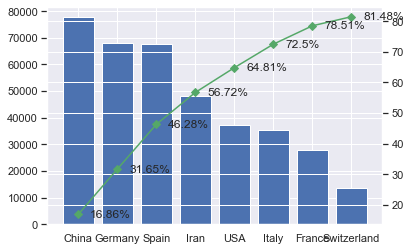

In [20]:
fig, ax1 = plt.subplots()

ax1.bar(data=recover_country_f[:8], x=recover_country_f[:8].index, height='total_recovered')

ax2 = ax1.twinx()
ax2.plot(recover_country_f[:8].index, recover_country_f[:8]['cum_fre'], color='g', marker='D')
for i, j in enumerate(recover_country_f[:8]['cum_fre']):
    ax2.text(i+.3, j-1, s=str(round(j, 2))+'%')

# by Region

In [21]:
def stats(group):
    return {'count': group.count(),
            'sum': group.sum(),
            'mean': group.mean(),
            'median': group.median(),
            'max': group.max(),
            'min': group.min(),
            'std': group.std()}

In [22]:
recover_region_f = df['total_recovered'].groupby(df['region']).apply(stats).unstack()

In [23]:
recover_region_f['CoV'] = round(recover_region_f['std'] / recover_region_f['mean'], 2)

In [25]:
recover_region_f

,count,sum,mean,median,max,min,std,CoV
region,,,,,,,,
Australia & New Zealand,2.0,4226.000000,2113.000000,2113.0,3598.0,628.0,2100.107140,0.99
Caribbean,16.0,513.000000,32.062500,11.5,162.0,0.0,47.254585,1.47
Central America,8.0,2142.000000,267.750000,22.0,1964.0,0.0,685.814583,2.56
Central Asia,3.0,373.000000,124.333333,99.0,203.0,71.0,69.550941,0.56
Eastern Africa,19.0,381.000000,20.052632,8.0,69.0,0.0,22.658022,1.13
Eastern Asia,7.0,86644.000000,12377.714286,434.0,77738.0,5.0,28949.223885,2.34
Eastern Europe,10.0,4662.000000,466.200000,168.5,1694.0,81.0,534.166599,1.15
Melanesia,3.0,1.000000,0.333333,0.0,1.0,0.0,0.577350,1.73
Middle Africa,9.0,170.000000,18.888889,4.0,130.0,0.0,42.081601,2.23


## Top

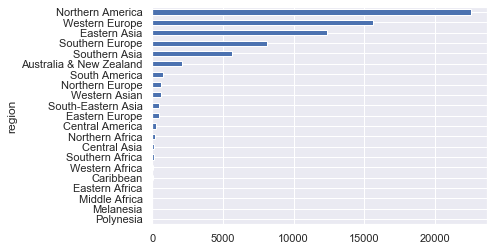

In [26]:
recover_region_f.sort_values(by='mean')['mean'].plot(kind='barh')

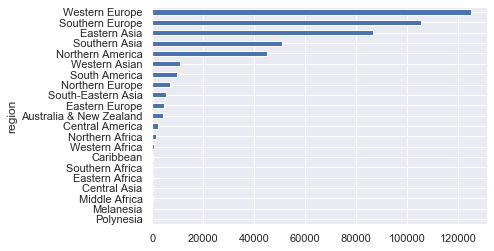

In [27]:
recover_region_f.sort_values(by='sum')['sum'].plot(kind='barh')

# by Continent

In [29]:
recover_continent_stats_t = df['total_recovered'].groupby(df['continent']).apply(stats).unstack()

In [30]:
recover_continent_stats_t['CoV'] = round(recover_continent_stats_t['std'] / recover_continent_stats_t['mean'], 2)

In [31]:
recover_continent_stats_t

,count,sum,mean,median,max,min,std,CoV
continent,,,,,,,,
Africa,55.0,3145.000000,57.181818,7.0,601.0,0.0,126.381124,2.21
Asia,48.0,154325.000000,3215.104167,172.5,77738.0,0.0,13010.469258,4.05
Europe,42.0,241823.244681,5757.696302,259.5,68200.0,5.0,15735.645667,2.73
Latin America and Caribbean,37.0,12569.000000,339.702703,22.0,2979.0,0.0,780.863157,2.30
Northern America,2.0,45082.000000,22541.000000,22541.0,37326.0,7756.0,20909.147520,0.93
Oceania,6.0,4227.000000,704.500000,0.5,3598.0,0.0,1439.587962,2.04


## Top

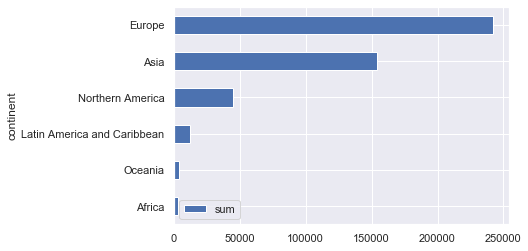

In [32]:
recover_continent_stats_t[['sum']].sort_values(by='sum').plot(kind='barh')

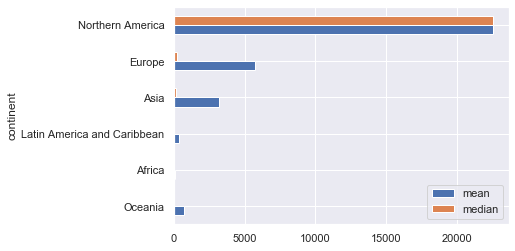

In [33]:
recover_continent_stats_t[['mean', 'median']].sort_values(by='median').plot(kind='barh')

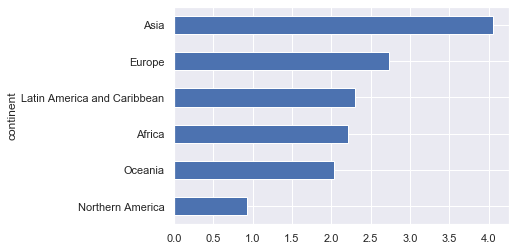

In [34]:
recover_continent_stats_t['CoV'].sort_values().plot(kind='barh')

# by BRI-membership

In [35]:
pd.crosstab(df['bri_country'], df['continent'], margins=True)

continent,Africa,Asia,Europe,Latin America and Caribbean,Northern America,Oceania,All
bri_country,,,,,,,
bri_member,42,37,25,18,0,3,125
non_member,13,11,17,19,2,3,65
All,55,48,42,37,2,6,190


In [38]:
recover_bri_stats_t = df['total_recovered'].groupby(df['bri_country']).apply(stats).unstack()

In [39]:
recover_bri_stats_t['CoV'] = round(recover_bri_stats_t['std'] / recover_bri_stats_t['mean'], 2)

In [40]:
recover_bri_stats_t

,count,sum,mean,median,max,min,std,CoV
bri_country,,,,,,,,
bri_member,125.0,209682.000000,1677.456000,80.0,77738.0,0.0,8719.603795,5.20
non_member,65.0,251489.244681,3869.065303,55.0,68200.0,0.0,12952.841135,3.35


## each Continent

### Sum

In [70]:
recover_bri_con_sum_t = pd.pivot_table(data=df,
                index=['bri_country'],
               values=['total_recovered'],
               columns=['continent'],
               aggfunc=np.sum,
               margins=True)

In [71]:
row_f = pd.DataFrame([recover_bri_con_sum_t.loc['bri_member'] / recover_bri_con_sum_t.loc['non_member']])
recover_bri_con_sum_t = pd.concat([recover_bri_con_sum_t, row_f])
recover_bri_con_sum_t.rename({0: 'bri / non'}, axis='index', inplace=True)

In [72]:
recover_bri_con_sum_t

total_recovered                                ...                                             
continent           Africa           Asia         Europe  ... Northern America      Oceania            All
bri_member     2792.000000  149398.000000   50551.000000  ...              NaN   628.000000  209682.000000
non_member      353.000000    4927.000000  191272.244681  ...          45082.0  3599.000000  251489.244681
All            3145.000000  154325.000000  241823.244681  ...          45082.0  4227.000000  461171.244681
bri / non         7.909348      30.322306       0.264288  ...              NaN     0.174493       0.833761

[4 rows x 7 columns]

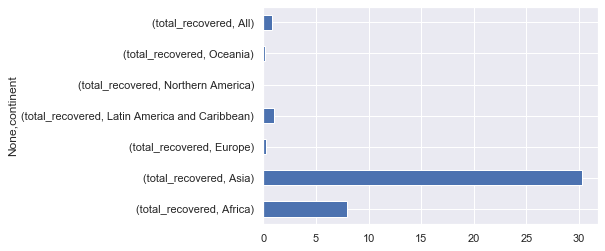

In [83]:
recover_bri_con_sum_t.loc['bri / non'].plot(kind='barh')

### Mean

In [57]:
recover_bri_con_mean_t = pd.pivot_table(data=df,
                index=['bri_country'],
               values=['total_recovered'],
               columns=['continent'],
               aggfunc=np.mean)

In [84]:
row_f = pd.DataFrame([recover_bri_con_mean_t.loc['bri_member'] / recover_bri_con_mean_t.loc['non_member']])
recover_bri_con_mean_t = pd.concat([recover_bri_con_mean_t, row_f])
recover_bri_con_mean_t.rename({0: 'bri / non'}, axis='index', inplace=True)

In [69]:
recover_bri_con_mean_t

total_recovered                                                                                     
continent           Africa         Asia        Europe Latin America and Caribbean Northern America      Oceania
bri_member       66.476190  4037.783784   2022.040000                  350.722222              NaN   209.333333
non_member       27.153846   447.909091  11251.308511                  329.263158          22541.0  1199.666667
bri / non         2.448132     9.014740      0.179716                    1.065173              NaN     0.174493

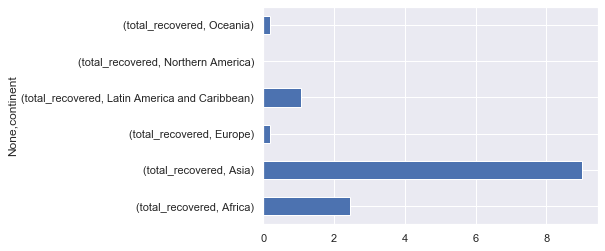

In [86]:
recover_bri_con_mean_t.loc['bri / non'].plot(kind='barh')

### Median

In [46]:
pd.pivot_table(data=df,
                index=['bri_country'],
               values=['total_recovered'],
               columns=['continent'],
               aggfunc=np.median)

total_recovered                                                                   
continent            Africa   Asia Europe Latin America and Caribbean Northern America Oceania
bri_country                                                                                   
bri_member              7.5  176.0  236.0                        22.0              NaN     0.0
non_member              4.0  124.0  381.0                        22.0          22541.0     1.0

### Get total deaths each continent by bri_membership

In [87]:
def get_(group, key):
    totals = group.groupby(key)['total_recovered'].sum()
    return totals.sort_values(ascending=False)

In [88]:
df.groupby('bri_country').apply(get_, 'continent')

bri_country  continent                  
bri_member   Asia                           149398.000000
             Europe                          50551.000000
             Latin America and Caribbean      6313.000000
             Africa                           2792.000000
             Oceania                           628.000000
non_member   Europe                         191272.244681
             Northern America                45082.000000
             Latin America and Caribbean      6256.000000
             Asia                             4927.000000
             Oceania                          3599.000000
             Africa                            353.000000
Name: total_recovered, dtype: float64

### Percentage of total deaths by Bri-membership for each death size

In [89]:
bins = np.array([0, 10, 100, 1000, 10000, 100000])

In [90]:
labels = pd.cut(df['total_recovered'], bins)

In [91]:
grouped = df.groupby(['bri_country', labels])

In [92]:
bucket_sum = grouped['total_recovered'].sum().unstack(0)

In [104]:
normed_sum = bucket_sum.div(bucket_sum.sum(axis=1), axis=0)

In [106]:
normed_sum

bri_country,bri_member,non_member
total_recovered,,
"(0, 10]",0.649718,0.350282
"(10, 100]",0.689295,0.310705
"(100, 1000]",0.746663,0.253337
"(1000, 10000]",0.506363,0.493637
"(10000, 100000]",0.429280,0.570720


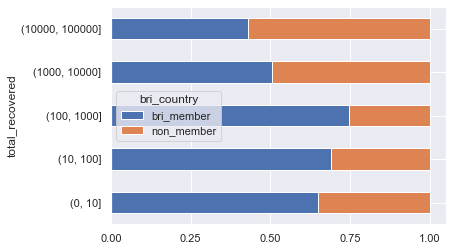

In [108]:
normed_sum.plot(kind='barh', stacked=True, xticks=[.0, .25, .5, .75, 1])

# by Freedom Indexes

In [254]:
recover_index_f = df[['total_recovered', 'life_expectancy_index_2019', 'happiness_index_2019',
       'corruption_perception_index_2019', 'democracy_index_2019',
       'economic_freedom_index_2019', 'press_freedom_index_2019', 'region', 'country', 'bri_country', 'continent']]

## by Country

In [210]:
recover_index_f.corr()['total_recovered']

total_recovered                     1.000000
life_expectancy_index_2019          0.218633
happiness_index_2019                0.172592
corruption_perception_index_2019    0.184833
democracy_index_2019                0.106343
economic_freedom_index_2019         0.100571
press_freedom_index_2019           -0.026263
Name: total_recovered, dtype: float64

In [240]:
by_country = recover_index_f.set_index('country')

In [247]:
by_country.loc[['China', 'Germany', 'Spain', 'Iran', 'USA', 'Italy', 'France',
       'Switzerland']].corr()['total_recovered']

total_recovered                     1.000000
life_expectancy_index_2019         -0.424063
happiness_index_2019               -0.460209
corruption_perception_index_2019   -0.375381
democracy_index_2019               -0.441392
economic_freedom_index_2019        -0.404589
press_freedom_index_2019           -0.501570
Name: total_recovered, dtype: float64

## by Region

In [222]:
by_region = recover_index_f.set_index('region').groupby('region')

In [227]:
recover_corr = lambda x: x.corrwith(x['total_recovered'])

In [228]:
rec_ind_byreg_corr_t = by_region.apply(recover_corr)

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [174]:
rec_ind_byreg_corr_t

,total_recovered,life_expectancy_index_2019,happiness_index_2019,corruption_perception_index_2019,democracy_index_2019,economic_freedom_index_2019,press_freedom_index_2019
region,,,,,,,
Australia & New Zealand,1.0,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Caribbean,1.0,0.295510,0.424197,-0.375814,-0.247049,-0.515860,-0.507486
Central America,1.0,-0.128890,0.239928,-0.117117,0.071839,0.319213,-0.454444
Central Asia,1.0,0.986941,0.312560,0.703606,-0.393443,1.000000,-0.644376
Eastern Africa,1.0,0.687704,0.490894,0.643983,0.351740,0.483554,-0.007098
Eastern Asia,1.0,-0.273023,-0.499366,-0.498941,-0.905688,-0.472764,-0.984323
Eastern Europe,1.0,-0.074425,0.294158,-0.199779,-0.366026,0.072564,-0.316956
Melanesia,1.0,0.980408,NaN,NaN,NaN,NaN,NaN
Middle Africa,1.0,-0.129566,0.436676,-0.133387,0.104972,0.194354,-0.076557


* life_expectancy_index_2019: 
 / Northern America           -1 
 / Southern Europe            0.538517
 / Eastern Africa             0.687704
 / Melanesia                  0.980408
 / Central Asia               0.986941
 / Australia & New Zealand    1.000000
 
* happiness_index_2019: 
 / Australia & New Zealand   -1.000000
 / Northern America          -1.000000
 / Southern Africa            0.546437
 
* corruption_perception_index_2019:
 / Eastern Africa             0.643983
 / Central Asia               0.703606
 / Australia & New Zealand   -1.000000
 / Northern America          -1.000000
 / Southern Africa           -0.851903
 
* democracy_index_2019:
 / South-Eastern Asia         0.531530
 / Australia & New Zealand   -1.000000
 / Northern America          -1.000000
 / Eastern Asia              -0.905688
 / Southern Asia             -0.626543
 
* economic_freedom_index_2019:
South-Eastern Asia         0.541399
Central Asia               1.000000
Australia & New Zealand   -1.000000
Northern America          -1.000000
Caribbean                 -0.515860

* press_freedom_index_2019:
Australia & New Zealand   -1.000000
Northern America          -1.000000
Eastern Asia              -0.984323
Southern Asia             -0.777677
Central Asia              -0.644376
Caribbean                 -0.507486

## by BRI-membership

In [251]:
by_bri = recover_index_f.groupby('bri_country')

In [252]:
recover_corr = lambda x: x.corrwith(x['total_recovered'])

In [253]:
by_bri.apply(recover_corr)

,total_recovered,life_expectancy_index_2019,happiness_index_2019,corruption_perception_index_2019,democracy_index_2019,economic_freedom_index_2019,press_freedom_index_2019
bri_country,,,,,,,
bri_member,1.0,0.174650,0.044667,0.029969,-0.102006,-0.002008,-0.259155
non_member,1.0,0.240285,0.229958,0.269381,0.272215,0.164776,0.213042


## by Continent

In [257]:
by_continent = recover_index_f.groupby('continent')

In [258]:
by_continent.apply(recover_corr)

,total_recovered,life_expectancy_index_2019,happiness_index_2019,corruption_perception_index_2019,democracy_index_2019,economic_freedom_index_2019,press_freedom_index_2019
continent,,,,,,,
Africa,1.0,0.298498,0.261744,0.220565,0.099359,0.014499,-0.044388
Asia,1.0,0.102028,-0.052410,-0.060444,-0.221280,-0.149050,-0.411464
Europe,1.0,0.332547,0.167163,0.199948,0.199453,0.001470,0.133908
Latin America and Caribbean,1.0,0.173500,0.217946,0.013079,0.275679,0.168488,-0.064394
Northern America,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Oceania,1.0,0.585179,-1.000000,0.504410,0.682075,0.622941,0.445588
